In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime as dt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from operator import is_not
from functools import partial

In [2]:
#dateparse = lambda dates: pd.datetime.strftime(dates, '%Y-%m-%d')
data = pd.read_csv('data/prepocessed.csv', encoding='utf8', engine='python')
data = data.drop(data.columns[0], axis=1)

In [3]:
states = data.State.unique()

In [6]:
for state in states:
    filename = "state Data/"+state + ".csv"
    datatemp = data.loc[data['State'] == state]
    datatemp = datatemp.groupby(['Date Local']).mean().reset_index()
    datatemp = datatemp[['Date Local','NO2 Mean']].copy()
    datatemp.to_csv(filename, ',', encoding='utf8')

In [10]:
timeSeriesList = []
j=0
for state in states:
    filename = "state Data/"+state+".csv"
    datatemp = pd.read_csv(filename, usecols=['NO2 Mean'])
    dataList = datatemp['NO2 Mean'].tolist()
    #timeSeries.append(state)
    #dataList.insert(100,j)
    seriesNP = np.asarray(dataList)
    #timeSeriesList.append(seriesNP[0:501])
    timeSeriesList.append(dataList[0:200])
    j=j+1
finaltimeSeriesList = np.asarray(timeSeriesList)
#print(finaltimeSeriesList)

In [11]:
def DTWDistance(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])
        
    return np.sqrt(DTW[len(s1)-1, len(s2)-1])


def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        if len(s2[(ind-r if ind-r>=0 else 0):(ind+r)])==0:
                  break
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return np.sqrt(LB_sum)

In [12]:
import random

def k_means_clust(data,num_clust,num_iter,w=5):
    centroids=random.sample(list(data),num_clust)
    print(type(centroids))
    counter=0
    for n in range(num_iter):
        counter+=1
        print(counter)
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                #if LB_Keogh(i,j,5)>=min_dist:
                #    print("LBK: ",LB_Keogh(i,j,5))
                #    print("min distance: ", min_dist)
                #if LB_Keogh(i,j,1)<min_dist:
                cur_dist=DTWDistance(i,j,w)
                if cur_dist>=min_dist:
                    print("Larger")
                if cur_dist<min_dist:
                    min_dist=cur_dist
                    closest_clust=c_ind
            #if closest_clust != None:            
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]

        #recalculate centroids of clusters
        #assignments = list(filter(partial(is_not, None), assignments))
        #assign = {}
        
        for key in assignments:
            print("***key: ", key)
            clust_sum=[0]*300
            if key is not None:
                for k in assignments[key]:
                    #print(len(data[k]))
                    #print("*********", (clust_sum))
                    clust_sum=clust_sum+data[k]
                #print(clust_sum)    
                centroids[key]=[m/len(assignments[key]) for m in clust_sum if len(assignments[key])!=0]
    
    return centroids, assignments

In [13]:
#dataForKmeans = finaltimeSeriesList[:,:-1]
#print(dataForKmeans)
#centroids, assignments=k_means_clust(dataForKmeans,4,10,5)
centroids, assignments=k_means_clust(finaltimeSeriesList,4,10,5)
print(len(centroids[1]))

print(assignments)
for i in centroids:
    plt.plot(i)
    
plt.show()

<class 'list'>
1
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
Larger
***key:  1


ValueError: operands could not be broadcast together with shapes (30,) (200,) 

In [20]:
dictionary = {}
for i in assignments:
    list = assignments[i]
    tempList = []
    for state in list:
        tempList.append(states[state])
    dictionary[i] = tempList
print(dictionary)

{0: ['District Of Columbia', 'Illinois', 'Michigan', 'New Jersey', 'New York', 'Pennsylvania', 'Massachusetts', 'Country Of Mexico', 'Utah'], 3: ['Indiana', 'Louisiana', 'Missouri', 'North Carolina', 'Texas', 'Virginia', 'Connecticut', 'Wisconsin', 'Georgia', 'New Mexico'], 1: ['Florida', 'Kansas', 'Kentucky', 'New Hampshire', 'Maryland', 'Arkansas', 'Oregon', 'Delaware', 'Alabama', 'Washington', 'Alaska'], 2: ['Nevada', 'Tennessee', 'South Carolina', 'Iowa', 'Maine', 'Wyoming', 'North Dakota', 'Idaho', 'Ohio', 'Hawaii', 'Minnesota', 'Rhode Island', 'South Dakota']}


In [22]:
base = dt.datetime(2000, 1, 1, 0, 0, 0)
datelist = pd.date_range(base, periods=201).tolist()
print(datelist[1])

2000-01-02 00:00:00


In [23]:
print(len(datelist), len(centroids[0]))

cluster1 = pd.DataFrame({'Date':datelist, 'NO2 Mean':centroids[0]})
cluster1['Date'] = pd.to_datetime(cluster1['Date'], format='%Y-%m-%d')


cluster2 = pd.DataFrame({'Date':datelist, 'NO2 Mean':centroids[1]})
cluster2['Date'] = pd.to_datetime(cluster2['Date'], format='%Y-%m-%d')

cluster3 = pd.DataFrame({'Date':datelist, 'NO2 Mean':centroids[2]})
cluster3['Date'] = pd.to_datetime(cluster3['Date'], format='%Y-%m-%d')

cluster4 = pd.DataFrame({'Date':datelist, 'NO2 Mean':centroids[3]})
cluster4['Date'] = pd.to_datetime(cluster4['Date'], format='%Y-%m-%d')

201 201


In [24]:
cluster1TS = cluster1.set_index('Date')
cluster2TS = cluster2.set_index('Date')
cluster3TS = cluster3.set_index('Date')
cluster4TS = cluster4.set_index('Date')

District Of Columbia, Illinois, Michigan, New Jersey, New York, Pennsylvania, Massachusetts, Country Of Mexico, Utah


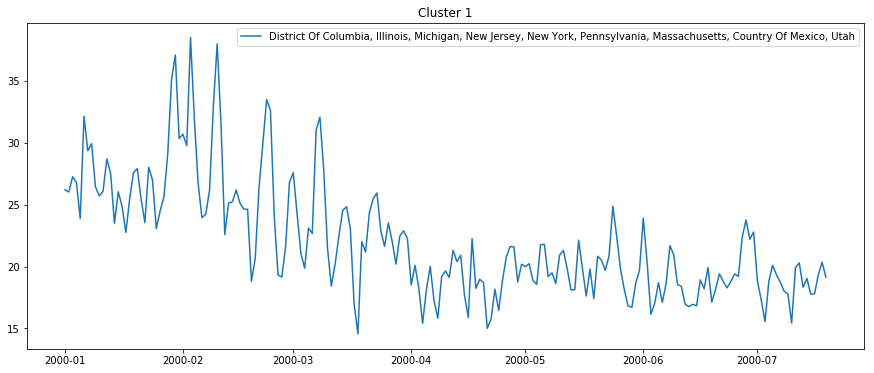

In [25]:
label=", ".join(str(x) for x in dictionary[0])
print(label)
plt.plot(cluster1TS, label=label)
plt.legend(loc="best")
plt.title("Cluster 1")
plt.show(block=False)

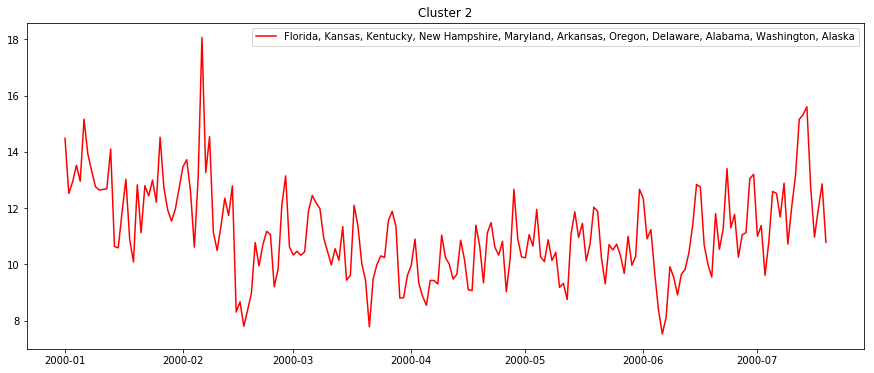

In [26]:
label=", ".join(str(x) for x in dictionary[1])
plt.plot(cluster2TS, label=label, color='red')
plt.legend(loc="best")
plt.title("Cluster 2")
plt.show(block=False)

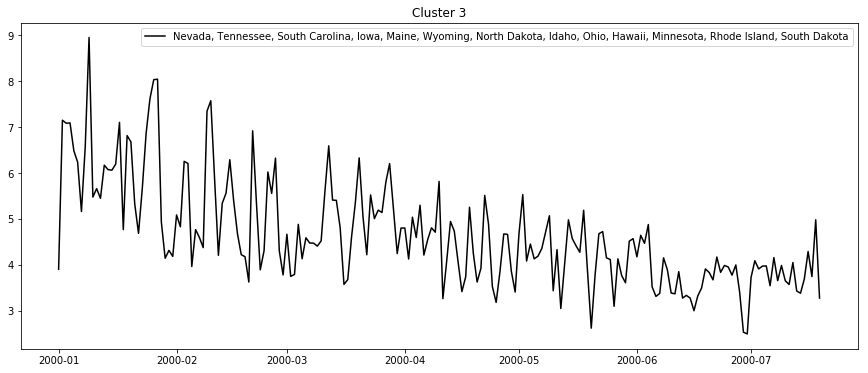

In [27]:
label=", ".join(str(x) for x in dictionary[2])
plt.plot(cluster3TS, label=label, color='black')
plt.legend(loc="best")
plt.title("Cluster 3")
plt.show(block=False)

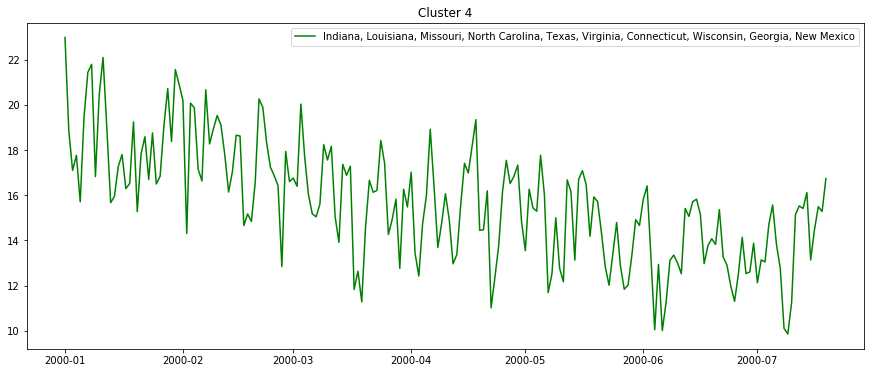

In [28]:
label=", ".join(str(x) for x in dictionary[3])
plt.plot(cluster4TS, label=label, color='green')
plt.legend(loc="best")
plt.title("Cluster 4")
plt.show(block=False)

In [29]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
X = cluster1TS.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

In [31]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=21.096506, expected=19.820955
predicted=19.181848, expected=18.097955
predicted=18.147261, expected=18.133282
predicted=18.477806, expected=22.127452
predicted=22.348382, expected=19.843942
predicted=19.466382, expected=17.610924
predicted=17.715873, expected=19.799931
predicted=19.688566, expected=17.395128
predicted=17.345669, expected=20.831165
predicted=21.531390, expected=20.507375
predicted=19.772546, expected=19.688355
predicted=18.897861, expected=20.849028
predicted=20.346310, expected=24.868553
predicted=23.196791, expected=22.450143
predicted=21.180150, expected=19.826704
predicted=19.543941, expected=18.146618
predicted=18.622207, expected=16.821561
predicted=18.328946, expected=16.702654
predicted=19.131655, expected=18.634149
predicted=19.856625, expected=19.699068
predicted=19.518816, expected=23.904749
predicted=22.370144, expected=20.361957
predicted=18.288730, expected=16.140575
predicted=15.790602, expected=17.030464
predicted=17.975986, expected=18.692247


Test MSE: 3.232


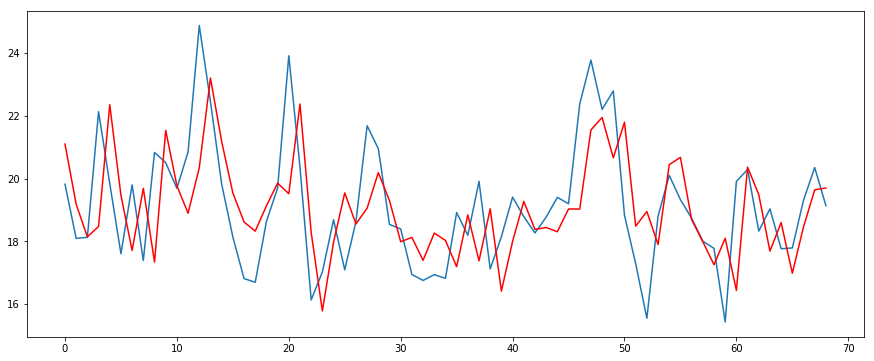

In [32]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()